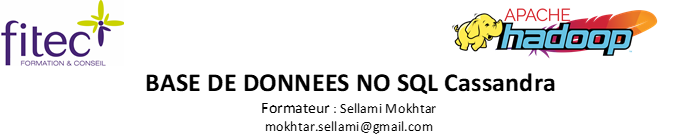

# Ingestion des données à partir de github COVID 19

Cassandra joue un rôle important dans la réalisation des applications analytique big data. Dans cet atelier on va simuler le Scénario dont laquelle Cassandra joue un rôle en amant pour le stockage de données arrivant de web. Puis on va exploiter ces données afin de créer des analyses sophistiques en utilisant Python Data Analysis.

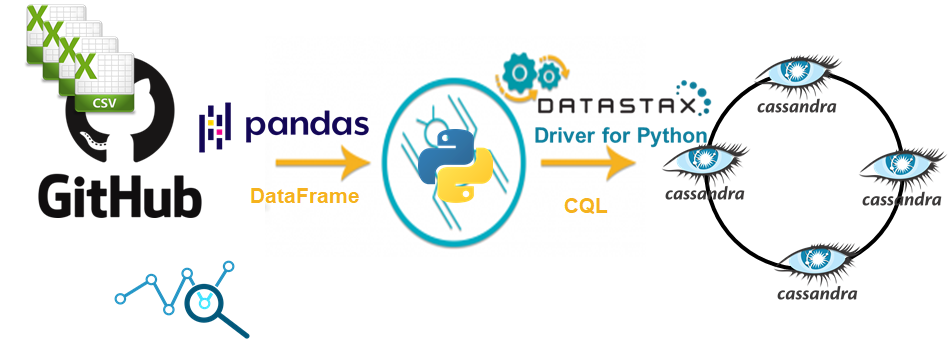

Ce notebook permet de récupérer des données sous de séries temporaires de COVID-19,
Objectifs
- 1 Installation et chargement des librairies nécessaires
- 2 Extraire les données COVID (CSV) à partir de dépot gihub en utilisant DataFrame Pandas
- 3 Transformation de données avec Pandas (voir ce lien pour plus détails http://www.python-simple.com/python-pandas/panda-intro.php)
    - Réorganisation des données
    - Fusionner les données
- 4 Ingester les données à Casandra
    - Connecter au cluster Cassandra
    - Charger les données vers cassandra
        * Insertion des données (pays) vers Cassandra
        * Mettre a jour les données (Covid) dans Cassandra


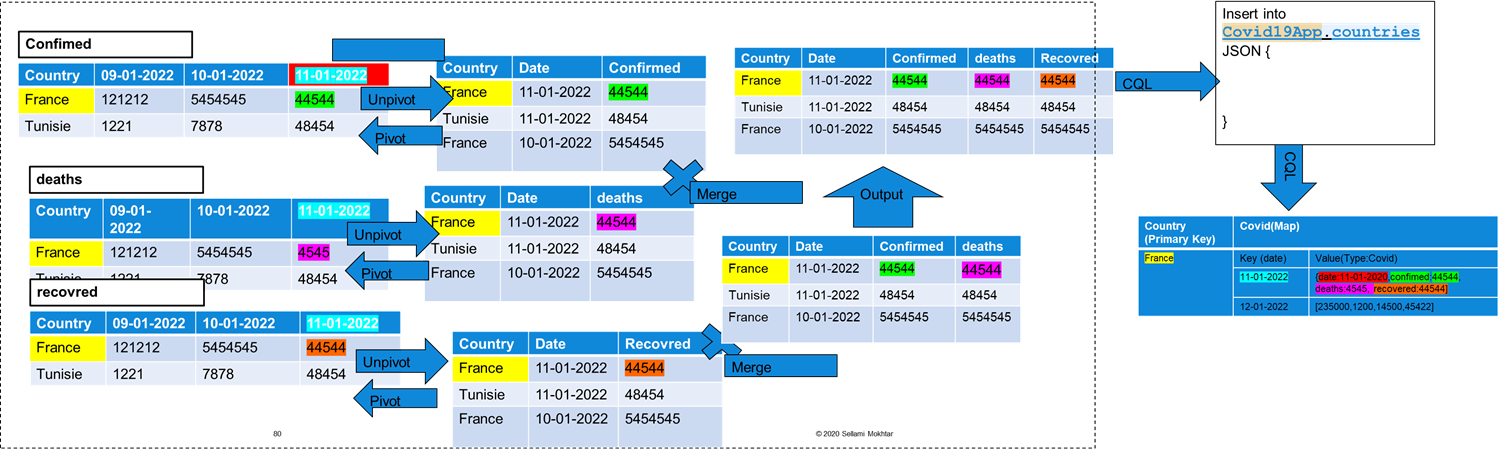

# 1- Installation et chargement des librairies nécessaires

### 1- Installation des libraries necessaires en utilisant /Shell et pip

In [2]:
!pip install cassandra-driver
#!pip install pandas==0.20.0.

In [1]:
!pip install cassandra-driver
#!pip install pandas==0.20.0.

### 2 - chargement des librairies nécessaires

In [3]:
import pandas as pd
from cassandra.cluster import Cluster
from datetime import date
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
today = date.today()
# dd/mm/YY
date_ingestion = today.strftime("%Y-%m-%d")
print("date_ingestion =", date_ingestion)

date_ingestion = 2022-01-11


In [2]:
import pandas as pd
from cassandra.cluster import Cluster
from datetime import date
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
today = date.today()
# ddmm.YY
date_ingestion = today.strftime("%Y-%m-%d")
print("date_ingestion =", date_ingestion)

date_ingestion = 2022-01-12


In [4]:
pd.__version__

'1.1.3'

In [3]:
pd.__version__

'0.24.2'

# 2 - Extraire les données COVID (CSV) à partir de dépot gihub  
### 1- Chargement de données a partir du web

In [5]:
#specifier les urls necessaires au données COVID-19
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovred='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


In [4]:
#specifier les urls necessaires aux données COVID-19
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

### 2- Définir Dataframe pour charger chaque fichier

In [6]:

data_confirmed = pd.read_csv(url_confirmed, sep=",",  quotechar='"', encoding="utf-8")# quote pour traiter les cas comme de champs contenant des sperateurs ','  "Korea, South"
data_deaths = pd.read_csv(url_deaths, sep=",",  quotechar='"', encoding="utf-8")
data_recovred= pd.read_csv(url_recovred, sep=",",  quotechar='"', encoding="utf-8")
 

In [14]:
data_confirmed = pd.read_csv(url_confirmed, sep=",", quotechar='"', encoding="utf-8") # quote pour traiter les cas comme de champs contenant des séparateurs ',' "Korea, South"
#data_deaths = pd.read_csv(url_deaths, sep=",", quotechar'"', encoding="utf-8")
data_deaths = pd.read_csv(url_deaths, sep=",", quotechar='"', encoding="utf-8")
data_recovered= pd.read_csv(url_recovered, sep=",", quotechar='"', encoding="utf-8")

In [7]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316


In [6]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148


# 3-Transformation de données
### 1- Pivotez les détails de chaque pays
recuperer les colonnes decrivant les pays et les colonnes contenant les dates

In [8]:
data_columns=data_confirmed.columns
country_columns=['Province/State', 'Country/Region', 'Lat', 'Long']
date_columns=data_columns[4:]
country_columns

['Province/State', 'Country/Region', 'Lat', 'Long']

In [7]:
data_columns=data_confirmed.columns
country_columns=['Province/State', 'Country/Region', 'Lat', 'Long']
date_columns=data_columns[4:]
country_columns

['Province/State', 'Country/Region', 'Lat', 'Long']

Je veux "décomposer" ces données d'un format large à un format long en utilisant la méthode pandas  -- melt() -- .

Sur le dfDataFrame, nous allons appeler la melt()méthode et définir les arguments suivants:
- id_vars à ['Province/State', 'Country/Region', 'Lat', 'Long'] puisque chaque ligne de df est identifiée par les information sur le pays
- var_nameà 'date'depuis cette nouvelle colonne a besoin d' un nom
- value_name à 'confirmed'depuis cette nouvelle colonne a besoin d' un nom

In [9]:
data_confirmed_unpivoted = pd.melt(data_confirmed,id_vars= ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='confirmed')


In [9]:
#data_confirmed_unpivoted = pd.melt(data_confirmed,id_vars= ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name'confirmed)
data_confirmed_unpivoted = pd.melt(data_confirmed,id_vars= ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='confirmed')

In [10]:
data_confirmed_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [10]:
data_confirmed_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [11]:
data_deaths_unpivoted = pd.melt(data_deaths,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='deaths')


In [15]:
#data_deaths_unpivoted = pd.melt(data_deaths,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='deaths'')
data_deaths_unpivoted = pd.melt(data_deaths,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='deaths')

In [12]:
data_recovred_unpivoted = pd.melt(data_recovred,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='recovred')

In [16]:
data_recovered_unpivoted = pd.melt(data_recovered,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='recovered')

In [13]:
data_confirmed_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [17]:
data_confirmed_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [14]:
data_deaths_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [15]:
data_recovred_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,recovred
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [18]:
data_recovered_unpivoted.head()

,Province/State,Country/Region,Lat,Long,date,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


### 2 -  Description des données

In [16]:
data_confirmed_unpivoted.describe()

,Lat,Long,confirmed
count,200160.000000,200160.000000,2.016000e+05
mean,20.156042,21.788955,3.855808e+05
std,25.237866,76.063185,2.305754e+06
min,-51.796300,-178.116500,0.000000e+00
25%,4.570900,-42.604300,1.960000e+02
50%,21.517170,20.921188,3.912000e+03
75%,40.463667,85.240100,7.875700e+04
max,71.706900,178.065000,6.155808e+07


In [19]:
data_confirmed_unpivoted.describe()

,Lat,Long,confirmed
count,200438.000000,200438.000000,2.018800e+05
mean,20.156042,21.788955,3.866027e+05
std,25.237866,76.063185,2.311185e+06
min,-51.796300,-178.116500,0.000000e+00
25%,4.570900,-42.604300,1.960000e+02
50%,21.517170,20.921188,3.932500e+03
75%,40.463667,85.240100,7.903375e+04
max,71.706900,178.065000,6.230847e+07


### 3 - Tester les données:

In [17]:
data_confirmed_unpivoted.groupby('Country/Region' )[ 'confirmed' ].max()

Country/Region
Afghanistan            158394
Albania                220487
Algeria                222639
Andorra                 27983
Angola                  90316
                       ...   
Vietnam               1914393
West Bank and Gaza     472910
Yemen                   10197
Zambia                 284389
Zimbabwe               223000
Name: confirmed, Length: 196, dtype: int64

In [20]:
data_confirmed_unpivoted.groupby('Country/Region')['confirmed'].max()

Country/Region
Afghanistan                 158471
Albania                     222664
Algeria                     223196
Andorra                      28542
Angola                       91148
Antigua and Barbuda           5058
Argentina                  6533635
Armenia                     346224
Australia                   536025
Austria                    1361741
Azerbaijan                  622236
Bahamas                      29489
Bahrain                     296253
Bangladesh                 1598389
Barbados                     32795
Belarus                     709622
Belgium                    2307843
Belize                       38072
Benin                        25522
Bhutan                        2830
Bolivia                     697236
Bosnia and Herzegovina      304856
Botswana                    232432
Brazil                    22636359
Brunei                       15678
Bulgaria                    794240
Burkina Faso                 19636
Burma                       532402
Burun

### 4 -  Fusion des données des trois fichiers
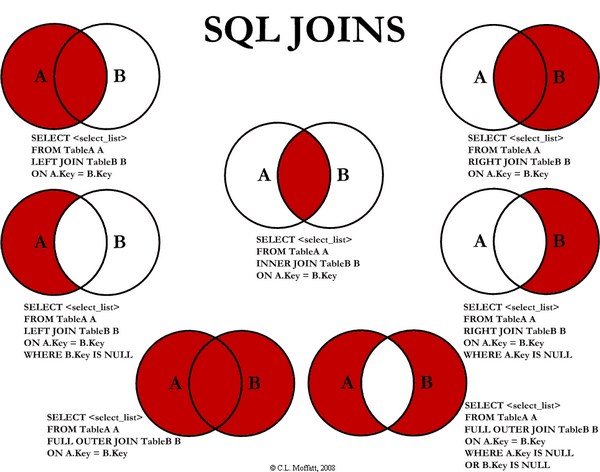

In [19]:
# Fusion des données des tois fichiers
new_covid_data = data_confirmed_unpivoted.merge(data_recovred_unpivoted, left_on=['Province/State','Country/Region', 'Lat', 'Long', 'date'], right_on = ['Province/State','Country/Region', 'Lat', 'Long','date'], how='left')

In [21]:
# Fusion des données des trois fichiers
new_covid_data = data_confirmed_unpivoted.merge(data_recovered_unpivoted, left_on=['Province/State','Country/Region', 'Lat', 'Long','date'], right_on = ['Province/State','Country/Region', 'Lat', 'Long','date'], how='left')

In [20]:
new_covid_data.tail(5)

,Province/State,Country/Region,Lat,Long,date,confirmed,recovred
201595,NaN,Vietnam,14.058324,108.277199,1/10/22,1914393,0.0
201596,NaN,West Bank and Gaza,31.952200,35.233200,1/10/22,472910,0.0
201597,NaN,Yemen,15.552727,48.516388,1/10/22,10197,0.0
201598,NaN,Zambia,-13.133897,27.849332,1/10/22,284389,0.0
201599,NaN,Zimbabwe,-19.015438,29.154857,1/10/22,223000,0.0


In [23]:
#new_covid_data.tails(5)
new_covid_data.tail(5)

,Province/State,Country/Region,Lat,Long,date,confirmed,recovered
201875,NaN,Vietnam,14.058324,108.277199,1/11/22,1930428,0.0
201876,NaN,West Bank and Gaza,31.952200,35.233200,1/11/22,473302,0.0
201877,NaN,Yemen,15.552727,48.516388,1/11/22,10208,0.0
201878,NaN,Zambia,-13.133897,27.849332,1/11/22,287110,0.0
201879,NaN,Zimbabwe,-19.015438,29.154857,1/11/22,223000,0.0


In [21]:
# Fusion des données des tois fichiers
full_covid_data = new_covid_data.merge(data_deaths_unpivoted, left_on=['Province/State','Country/Region', 'Lat', 'Long', 'date'], right_on = ['Province/State','Country/Region', 'Lat', 'Long','date'], how='left')

In [24]:
# Fusion des données des trois fichiers
full_covid_data = new_covid_data.merge(data_deaths_unpivoted, left_on=['Province/State','Country/Region', 'Lat', 'Long', 'date'], right_on = ['Province/State','Country/Region', 'Lat', 'Long','date'], how='left')

In [22]:
full_covid_data.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,recovred,deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [25]:
full_covid_data.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,recovered,deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [24]:
full_covid_data.groupby(['Country/Region'])['deaths'].max()

Country/Region
Afghanistan            7373
Albania                3241
Algeria                6349
Andorra                 141
Angola                 1832
                      ...  
Vietnam               34531
West Bank and Gaza     4987
Yemen                  1986
Zambia                 3817
Zimbabwe               5180
Name: deaths, Length: 196, dtype: int64

In [26]:
full_covid_data.groupby(['Country/Region'])['deaths'].max()

Country/Region
Afghanistan                 7374
Albania                     3247
Algeria                     6363
Andorra                      141
Angola                      1840
Antigua and Barbuda          120
Argentina                 117595
Armenia                     8006
Australia                   1614
Austria                    13872
Azerbaijan                  8471
Bahamas                      717
Bahrain                     1397
Bangladesh                 28107
Barbados                     266
Belarus                     5739
Belgium                    28539
Belize                       607
Benin                        161
Bhutan                         3
Bolivia                    20056
Bosnia and Herzegovina     13673
Botswana                    2497
Brazil                    620507
Brunei                        98
Bulgaria                   31761
Burkina Faso                 333
Burma                      19295
Burundi                       38
Cabo Verde                  

In [25]:
full_covid_data_grouped=full_covid_data.groupby(['Country/Region'])
full_covid_data_grouped.tail()

,Province/State,Country/Region,Lat,Long,date,confirmed,recovred,deaths
200200,NaN,Afghanistan,33.939110,67.709953,1/6/22,158275,0.0,7367
200201,NaN,Albania,41.153300,20.168300,1/6/22,213257,0.0,3228
200202,NaN,Algeria,28.033900,1.659600,1/6/22,220825,0.0,6318
200203,NaN,Andorra,42.506300,1.521800,1/6/22,25289,0.0,141
200204,NaN,Angola,-11.202700,17.873900,1/6/22,87625,0.0,1799
...,...,...,...,...,...,...,...,...
201595,NaN,Vietnam,14.058324,108.277199,1/10/22,1914393,0.0,34531
201596,NaN,West Bank and Gaza,31.952200,35.233200,1/10/22,472910,0.0,4987
201597,NaN,Yemen,15.552727,48.516388,1/10/22,10197,0.0,1986
201598,NaN,Zambia,-13.133897,27.849332,1/10/22,284389,0.0,3817


In [27]:
full_covid_data_grouped=full_covid_data.groupby(['Country/Region'])
full_covid_data_grouped.tail()

,Province/State,Country/Region,Lat,Long,date,confirmed,recovered,deaths
200480,NaN,Afghanistan,33.939110,67.709953,1/7/22,158300,0.0,7368
200481,NaN,Albania,41.153300,20.168300,1/7/22,214905,0.0,3233
200482,NaN,Algeria,28.033900,1.659600,1/7/22,221316,0.0,6325
200483,NaN,Andorra,42.506300,1.521800,1/7/22,26408,0.0,141
200484,NaN,Angola,-11.202700,17.873900,1/7/22,88775,0.0,1809
200485,NaN,Antigua and Barbuda,17.060800,-61.796400,1/7/22,4715,0.0,119
200486,NaN,Argentina,-38.416100,-63.616700,1/7/22,6135836,0.0,117428
200487,NaN,Armenia,40.069100,45.038200,1/7/22,345518,0.0,7997
200496,NaN,Austria,47.516200,14.550100,1/7/22,1321725,0.0,13830
200497,NaN,Azerbaijan,40.143100,47.576900,1/7/22,620049,0.0,8431


### 5 -  Nettoyage de données
On supprime les valeurs nulles (nan) dans notre jeux de données

In [29]:
full_covid_data.fillna("Neant")

,Province/State,Country/Region,Lat,Long,date,confirmed,recovred,deaths
0,Neant,Afghanistan,33.9391,67.71,1/22/20,0,0,0
1,Neant,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Neant,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Neant,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Neant,Angola,-11.2027,17.8739,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
201595,Neant,Vietnam,14.0583,108.277,1/10/22,1914393,0,34531
201596,Neant,West Bank and Gaza,31.9522,35.2332,1/10/22,472910,0,4987
201597,Neant,Yemen,15.5527,48.5164,1/10/22,10197,0,1986
201598,Neant,Zambia,-13.1339,27.8493,1/10/22,284389,0,3817


In [28]:
full_covid_data.fillna("Neant")

,Province/State,Country/Region,Lat,Long,date,confirmed,recovered,deaths
0,Neant,Afghanistan,33.9391,67.71,1/22/20,0,0,0
1,Neant,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Neant,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Neant,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Neant,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,Neant,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,Neant,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,Neant,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.012,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.209,1/22/20,0,0,0


 # 3 - Ingester les données à Casandra
    - 1 Connecter au cluster Cassandra
    - 2 Charger les données vers cassandra
         * Insertion des données (pays) vers Cassandra
        * Mettre a jour les données (Covid) dans Cassandra

### 1- Connecter au cluster Cassandra


  - définir les parametres de configuration d'accès au Cluster 

In [36]:
CASSANDRA_HOST = ['localhost'] 
CASSANDRA_PORT = 9042
CASSANDRA_DB = "covid19app"
CASSANDRA_TABLE = "countries"

def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)
#on force ici a repecter le datframe de pandas lors de la recuperation des données
try:
    cluster = Cluster(protocol_version=3,contact_points=CASSANDRA_HOST,load_balancing_policy=None,port=CASSANDRA_PORT)
    session =cluster.connect()
except ValueError:
    print("Oops!  échec de connexion cluster.  Try again...")

In [1]:
CASSANDRA_HOST = ['localhost']
CASSANDRA_PORT = 9042
CASSANDRA_DB = "covid19app"
CASSANDRA_TABLE = "countries"

def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)
# on force ici à respecter le dataframe de pandas lors de la récupération des données
try:
    cluster = Cluster(protocol_version=3,contact_points=CASSANDRA_HOST,load_balancing_policy=None,port=CASSANDRA_PORT)
    #session = cluster.conect()
    session = cluster.connect()
except ValueError:
    print("Oops! échec de connexion cluster. Try again...")

NameError: name 'Cluster' is not defined

In [40]:
#creation du key space
session.execute("CREATE KEYSPACE IF NOT EXISTS Covid19App WITH REPLICATION={'class':'SimpleStrategy','replication_factor':1};")

In [41]:
#Creation de type Covid
session.execute("CREATE TYPE IF NOT EXISTS  Covid19App.CovidType ( date date, confirmed float, deaths float, recovred float,  active float);")
#Creation de la table  
session.execute("CREATE TABLE IF NOT EXISTS  Covid19App.countries (country TEXT, date DATE,  longitude Text,  latitude Text, Covid   map<date,frozen<CovidType>>, primary key (country ));")

In [45]:
rows=session.execute('Select * from Covid19App.countries;')
df_results = rows._current_rows
df_results.head()

,country,covid,date,latitude,longitude


- instancier un connexion au cluster et ouvrir une session sur le keyspace *** covid19app ****

In [43]:
session = cluster.connect('covid19app')  
session.row_factory = pandas_factory
session.default_fetch_size = 10000000 #needed for large queries, otherwise driver will do pagination. Default is 50000.

- Enregistrement d'une classe à mapper à un UDT  <br>
Vous pouvez indiquer au pilote Python de renvoyer les colonnes d'un UDT spécifique en tant qu'instances d'une classe en les enregistrant auprès de votre Cluster instance via ***Cluster.register_user_type()****: <br>
--  Créer une classe Python respectant les champs du UDTs Covid.

In [46]:
# create a class to map to the "address" UDT
class Covid(object):

    def __init__(self, date,confirmed, deaths,recovred,active):
        self.date = date
        try:
            self.confirmed =  (confirmed)
        except ValueError:
            self.confirmed = 0
 
        self.deaths =  (deaths)
        self.recovred= (recovred)
        self.active= (active)
        

--  Enregistrement d'une classe auprès de votre Cluster instance

In [47]:
cluster.register_user_type('covid19app', 'covidtype', Covid)

### 2 -Charger les données vers cassandra
        * Insertion des données (pays) vers Cassandra
       

créer une requete d'inserion des informations de chaque pay 

In [53]:
query_insert="INSERT INTO covid19app.countries (country, date, longitude, latitude,Covid) VALUES ($${}$$, '{}', '{}', '{}',{});"

Récuperer que la liste de pays tout en evitant les doublons 

In [54]:
df_countries = full_covid_data.drop_duplicates(subset = ['Country/Region', 'Lat', 'Long'])[['Country/Region', 'Lat', 'Long']]

In [55]:
df_countries.head()

,Country/Region,Lat,Long
0,Afghanistan,33.93911,67.709953
1,Albania,41.15330,20.168300
2,Algeria,28.03390,1.659600
3,Andorra,42.50630,1.521800
4,Angola,-11.20270,17.873900


Parcourir tous les pays une par une et reformuler une requête d'insertion respectant le schema CQL de la table countries.

In [57]:

for ct in df_countries.index:
     
    CQL_query = query_insert.format(df_countries['Country/Region'][ct],date_ingestion,df_countries['Lat'][ct],df_countries['Long'][ct],'{}') 
    #print(CQL_query)
    #break
    session.execute(CQL_query)
 

Tester l'insertion des données

In [58]:


#Executer une requete pour tester
rows = session.execute('SELECT * FROM Covid19App.countries ; ')
df_countries = rows._current_rows
df_countries.head()
    

,country,covid,date,latitude,longitude
0,Bangladesh,None,2022-01-11,90.3563,23.685
1,Malaysia,None,2022-01-11,101.97576600000001,4.210483999999999
2,Yemen,None,2022-01-11,48.516388,15.552726999999999
3,Lesotho,None,2022-01-11,28.2336,-29.61
4,Ecuador,None,2022-01-11,-78.1834,-1.8312


préparer la requête de mise àjour des informations COVID pour chaque pays dans preparted statments

In [59]:
query_update='UPDATE covid19App.countries SET covid =covid+?   WHERE country =?;'

récuperer a partir de dataframe que les données necessaires 

In [60]:

df_covid = full_covid_data[['Country/Region','date', 'confirmed', 'deaths','recovred']]

Parcourir les données et mettre à jour chaque pays par sa liste d'infos sur le covids.

Pour chaque pay (indice de chaque pays):
    - calculer nombre des cas actives
    - formater les date en respectant celle du cassandra 'mm-dd-yyy
    - instancier un objet de type Covid en utilisant la classe COVID
    - initialiser un dictionnaire et mettre à jour ce dictionnaire: 
      --  mapping entre Map (Cassandra <key, value> et Dictionnaire Pyton)
    - préparer la requete 
    - executer la requête de mise à jour

In [ ]:
#Pour chaque pay (indice de chaque pays):
for ct in df_covid.index:
    #- calculer nombre des cas actives
    active=df_covid['confirmed'][ct]-df_covid['deaths'][ct]-df_covid['recovred'][ct]
    #  formater les date en respectant celle du cassandra 'mm-dd-yyy
    date_object = datetime.strptime(df_covid['date'][ct], '%m/%d/%y')
    #  instancier un objet de type Covid en utilisant la classe COVID
    covid=Covid(date_object,df_covid['confirmed'][ct],df_covid['deaths'][ct],df_covid['recovred'][ct],active)  
    #  initialiser un dictionnaire et mettre à jour ce dictionnaire: 
    #      mapping entre Map (Cassandra <key, value> et Dictionnaire Pyton)
    row_dict = {}
    row_dict[date_object]=covid
    # print(row_dict)
    # break
    #  préparer la requete 
    covid_lookup_stmt = session.prepare(query_update)
    #  executer la requête de mise à jour
    session.execute(covid_lookup_stmt, [row_dict,df_covid['Country/Region'][ct]])   

### Vérifier si les mise à jours sont bien réalisées.
    

In [ ]:
#Test si engregistrement est effectué avec succes
#Executer une requete pour tester
rows = session.execute('SELECT country, Covid FROM Covid19App.countries ; ')
df_results = rows._current_rows
df_results.head()

In [ ]:
# 

In [ ]:
from cassandra.util import OrderedMapSerializedKey

def pandas_factory(colnames, rows):

    # Convert tuple items of 'rows' into list (elements of tuples cannot be replaced)
    rows = [list(i) for i in rows]

    # Convert only 'OrderedMapSerializedKey' type list elements into dict
    for idx_row, i_row in enumerate(rows):

        for idx_value, i_value in enumerate(i_row):

            if type(i_value) is OrderedMapSerializedKey:

                rows[idx_row][idx_value] = dict(rows[idx_row][idx_value])

    return pd.DataFrame(rows, columns=colnames)

In [ ]:

session.row_factory = pandas_factory

In [ ]:
query_select="SELECT country, covid FROM Covid19App.countries where date='{}' and country =$${}$$  ALLOW FILTERING;"
 

In [ ]:
CQL_query = query_select.format('2020-11-22','France') 
CQL_query

In [ ]:
  
rows=session.execute(CQL_query)
df_results = rows._current_rows
df_results.head()

In [ ]:
df_results = rows._current_rows
#Pour chaque pay (indice de chaque pays):
for ct in df_results.index:
    print("Country:")
    print(df_results['country'][ct])
    print('Date','confirmed','deaths','recovred','active')
    dic_covid=dict(df_results['covid'][ct]) 
    for key, covid in dic_covid.items() :
        print(key,covid.confirmed,covid.deaths,covid.recovred,covid.active)
  
       